<a href="https://colab.research.google.com/github/IbrahimBajwa313/Artificial-Neural-Networks/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth

# Authenticate and create the PyDrive client
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleAuth().credentials
drive = GoogleDrive(gauth)

Since mounting Google Drive and using PyDrive seem to be encountering issues, let's try downloading the file directly using the Google Drive API and the file ID. This approach is often more reliable in Colab.

In [3]:
from google.colab import auth
auth.authenticate_user()

from googleapiclient.discovery import build
import io
from googleapiclient.http import MediaIoBaseDownload

# Replace 'your_file_id' with the actual file ID from your Google Drive link
file_id = '1OA8_MuzTJbAl_HltOUEaJHxXrRkYa5Sr' # This is the file ID from your previous cell

# Authenticate and create the Drive service
drive_service = build('drive', 'v3')

# Request the file metadata
request = drive_service.files().get(fileId=file_id)
file_metadata = request.execute()
file_name = file_metadata['name']

# Download the file
request = drive_service.files().get_media(fileId=file_id)
downloaded = io.BytesIO()
downloader = MediaIoBaseDownload(downloaded, request)
done = False
while done is False:
    status, done = downloader.next_chunk()
    print(f"Download progress: {int(status.progress() * 100)}%")

downloaded.seek(0)

# Save the downloaded file to your Colab environment
with open(file_name, 'wb') as f:
    f.write(downloaded.read())

print(f"Downloaded '{file_name}' successfully.")

Download progress: 100%
Downloaded 'heart.csv' successfully.


Once the file is downloaded, you can load it into a pandas DataFrame like this:

In [4]:
import pandas as pd

# Replace 'heart.csv' with the actual filename if it's different
df = pd.read_csv(file_name)
display(df.head())

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
df = pd.get_dummies(df, drop_first=True)


# **Phase 1: Preprocess data**

Convert categorical columns

In [6]:
df

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,True,True,False,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,True,True,False,False,False,True,False,False,True
3,48,138,214,0,108,1.5,1,False,False,False,False,True,False,True,True,False
4,54,150,195,0,122,0.0,0,True,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,True,False,False,True,True,False,False,True,False
914,68,144,193,1,141,3.4,1,True,False,False,False,True,False,False,True,False
915,57,130,131,0,115,1.2,1,True,False,False,False,True,False,True,True,False
916,57,130,236,0,174,0.0,1,False,True,False,False,False,False,False,True,False


**Normalize numerical columns**

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop("HeartDisease", axis=1))

Train-test split

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaled_features, df["HeartDisease"], test_size=0.2, random_state=42)

In [9]:
dim = X_train.shape[1]

# Phase 2: ANN Model

**Build model**

In [15]:
from keras.models import Sequential
from keras.layers import Dense, Dropout,BatchNormalization

model = Sequential()
model.add(Dense(16, input_dim= dim, activation='relu'))
model.add(Dropout(0.3))
# model.add(BatchNormalization())
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Compile and train**

In [16]:
model.compile(loss='binary_crossentropy', optimizer='Adam' , metrics=['accuracy'])

In [17]:
from socket import EAI_ADDRFAMILY
history = model.fit(X_train,y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test))

Epoch 1/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5360 - loss: 0.7033 - val_accuracy: 0.7283 - val_loss: 0.6223
Epoch 2/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6087 - loss: 0.6485 - val_accuracy: 0.8261 - val_loss: 0.5599
Epoch 3/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6791 - loss: 0.5938 - val_accuracy: 0.8370 - val_loss: 0.5011
Epoch 4/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7913 - loss: 0.5011 - val_accuracy: 0.8261 - val_loss: 0.4506
Epoch 5/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7752 - loss: 0.4971 - val_accuracy: 0.8315 - val_loss: 0.4270
Epoch 6/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8069 - loss: 0.4898 - val_accuracy: 0.8370 - val_loss: 0.4093
Epoch 7/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7988 - loss: 0.4668 - val_accuracy: 0.8315 - val_loss: 0.3979
Epoch 8/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8179 - loss: 0.4007 - val_accuracy: 0.8315 - 

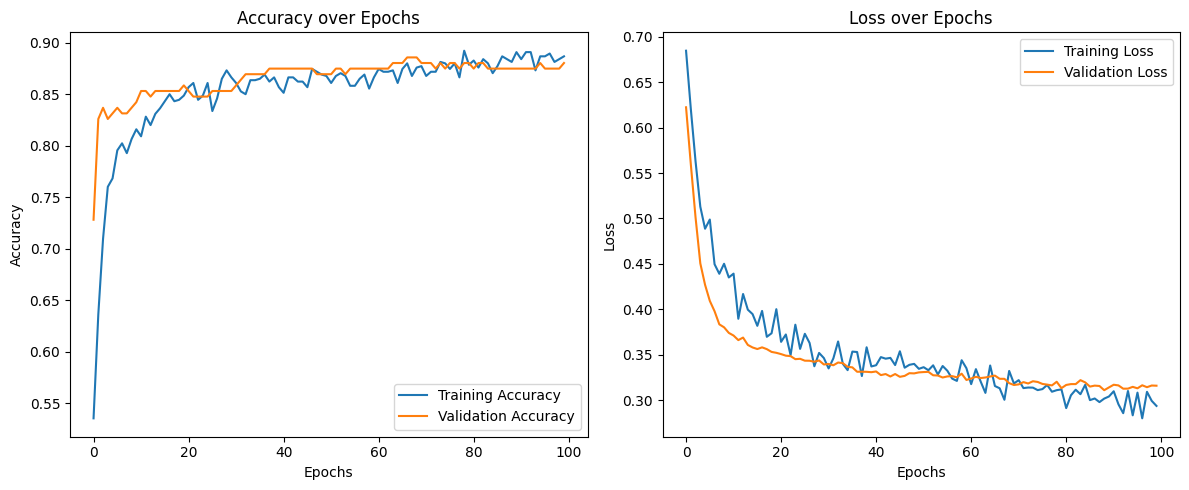

In [18]:
import matplotlib.pyplot as plt

# Assuming you stored the training history
history_dict = history.history

# Plot Accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_dict['accuracy'], label='Training Accuracy')
plt.plot(history_dict['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history_dict['loss'], label='Training Loss')
plt.plot(history_dict['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [19]:
loss, accuracy = model.evaluate(X_test,y_test)
print(f"Test Accuracy:{accuracy}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8687 - loss: 0.3324 
Test Accuracy:0.8804348111152649


In [ ]:
model.save("model.keras")

import joblib
joblib.dump(scaler, "scaler.pkl")


In [ ]:
from google.colab import files
# files.download("model.keras")
files.download("scaler.pkl")
